In [1]:
%matplotlib inline
import os

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

from parallel_map import parallel_map
from discrete_sampling.utils import get_binary_expansion_length

In [2]:
xs = list(range(3, 100000, 5))
xs_first = list(range(3, 100000, 2))

In [3]:
def f(x):
    if x % 100 == 0:
        print('getting %d', (x,))
    return get_binary_expansion_length(x)

# Recomputing the expansions can take several minutes.
fname_expansion = 'figure-2-sampler-sizes-data.npy'
if not os.path.exists(fname_expansion):
    ks = parallel_map(f, xs)
    L = [k[0] for k in ks]
    np.save(fname_expansion, L)

In [4]:
L = np.load(fname_expansion)

In [5]:
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['font.family'] = 'sans-serif'
matplotlib.rcParams['font.sans-serif'] = 'Computer Modern Sans serif'

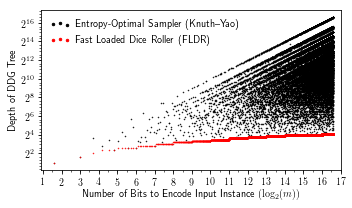

In [6]:
fig, ax = plt.subplots()

ax.scatter(np.log2(xs), L, marker='.', s=1, color='k', label='Entropy-Optimal Sampler (Knuth--Yao)')
ax.scatter(np.log2(xs), np.ceil(np.log2(xs)), marker='.', s=1, color='r',
    label='Fast Loaded Dice Roller (FLDR)')
ax.set_yscale('log', basey=2)
ax.set_xlabel('Number of Bits to Encode Input Instance $(\log_2(m))$')
ax.set_ylabel('Depth of DDG Tree')

legend = ax.legend(loc='upper left', scatterpoints=3, handletextpad=.5, framealpha=0)
for handle in legend.legendHandles:
    handle.set_sizes([24.0])

ax.set_xlim([0.9, 17])
# ax.xaxis.set_major_locator(ticker.IndexLocator(base=2, offset=2))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(.5))
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))

ax.yaxis.set_major_locator(
    matplotlib.ticker.LogLocator(base=2., subs=(1.,), numticks=10))
ax.yaxis.set_minor_locator(
    matplotlib.ticker.LogLocator(base=2., subs=[1.5,2,2.5], numticks=20))
ax.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

fig.set_size_inches(5, 3)
fig.set_tight_layout(True)
fig.set_facecolor('white')
for ext in ['pdf', 'png']:
    fig.savefig('figure-2-sampler-sizes.%s' % (ext,))